In [2]:
import pandas as pd
# data_to_count=pd.read_csv('dari_proses/data_to_count.csv',index_col=0) 

In [10]:
# ncbi_server_url = 'http://localhost:3030/mydataset/query'
# get_taxon_vector("Sogatella furcifera",ncbi_server_url)

[('spesies', 'NCBI:113103_Sogatella furcifera'),
 ('genus', 'NCBI:113102_Sogatella'),
 ('famili', 'NCBI:33362_Delphacidae'),
 ('ordo', 'NCBI:7524_Hemiptera'),
 ('kelas', 'NCBI:50557_Insecta'),
 ('filum', 'NCBI:6656_Arthropoda'),
 ('kingdom', 'NCBI:33208_Metazoa'),
 ('superkingdom', 'NCBI:2759_Eukaryota')]

# Enhancement

In [4]:
from modul.vectorReferenced import get_taxon_vector,cek_ncbi_id_by_wiki_id_via_string
from modul.filterNodeEdge import removeNodeAndEdgeByFilter,removeEdgesNotInNodes
from modul.helper_umum import contains_string_entire_column,contains_string_entire_column_boolean
import requests
import networkx as nx
import matplotlib.pyplot as plt

In [146]:
#2 ambil data dari globi
kolom=[
    'source_taxon_external_id',
    'source_taxon_name',
    'source_taxon_path',
    'source_taxon_path_ids',
    'source_taxon_path_ranks',
    
    'interaction_type',
    
    'target_taxon_external_id',
    'target_taxon_name',
    'target_taxon_path',
    'target_taxon_path_ids',
    'target_taxon_path_ranks',
]

interactionType="hostOf"
search="Bemisia tabaci"
link="https://api.globalbioticinteractions.org/interaction?sourceTaxon="+search+"&interactionType="+interactionType+"&fields="+(','.join(kolom))
response = requests.get(link)
res=response.json()
if not res['data']:
    print('stop kosong')
# JSON To Pandas Dataframe
df = pd.json_normalize(res, record_path =['data'])

In [147]:
df_serangga_hasil=df
kolom=[
    'source_taxon_external_id',
    'source_taxon_name',
    'source_taxon_path',
    'source_taxon_path_ids',
    'source_taxon_path_ranks',
    
    'interaction_type',
    
    'target_taxon_external_id',
    'target_taxon_name',
    'target_taxon_path',
    'target_taxon_path_ids',
    'target_taxon_path_ranks',
]
df_serangga_hasil.columns=kolom

In [148]:
df_serangga_hasil

,source_taxon_external_id,source_taxon_name,source_taxon_path,source_taxon_path_ids,source_taxon_path_ranks,interaction_type,target_taxon_external_id,target_taxon_name,target_taxon_path,target_taxon_path_ids,target_taxon_path_ranks
0,EOL:588056,Bemisia tabaci,Animalia | Arthropoda | Insecta | Hemiptera | ...,EOL:1 | EOL:164 | EOL:344 | EOL:539 | EOL:545 ...,kingdom | phylum | class | order | superfamily...,hasPathogen,EOL:300747,Simplicillium lamellicola,Fungi | Ascomycota | Sordariomycetes | Hypocre...,EOL:5559 | EOL:5577 | EOL:2858320 | EOL:5645 |...,kingdom | phylum | class | order | family | ge...
1,EOL:588056,Bemisia tabaci,Animalia | Arthropoda | Insecta | Hemiptera | ...,EOL:1 | EOL:164 | EOL:344 | EOL:539 | EOL:545 ...,kingdom | phylum | class | order | superfamily...,hasPathogen,EOL:32101,Acremonium,Fungi | Ascomycota | Sordariomycetes | Hypocre...,EOL:5559 | EOL:5577 | EOL:2858320 | EOL:5645 |...,kingdom | phylum | class | order | null | genus
2,EOL:588056,Bemisia tabaci,Animalia | Arthropoda | Insecta | Hemiptera | ...,EOL:1 | EOL:164 | EOL:344 | EOL:539 | EOL:545 ...,kingdom | phylum | class | order | superfamily...,hasPathogen,EOL:16364,Fusarium,Fungi | Ascomycota | Sordariomycetes | Hypocre...,EOL:5559 | EOL:5577 | EOL:2858320 | EOL:5645 |...,kingdom | phylum | class | order | family | genus
3,EOL:588056,Bemisia tabaci,Animalia | Arthropoda | Insecta | Hemiptera | ...,EOL:1 | EOL:164 | EOL:344 | EOL:539 | EOL:545 ...,kingdom | phylum | class | order | superfamily...,hasPathogen,EOL:16436,Aspergillus,Fungi | Ascomycota | Eurotiomycetes | Eurotial...,EOL:5559 | EOL:5577 | EOL:2860997 | EOL:5625 |...,kingdom | phylum | class | order | family | genus
4,EOL:588056,Bemisia tabaci,Animalia | Arthropoda | Insecta | Hemiptera | ...,EOL:1 | EOL:164 | EOL:344 | EOL:539 | EOL:545 ...,kingdom | phylum | class | order | superfamily...,hasPathogen,EOL_V2:190928,Paecilomyces fumosoroseus,Fungi | Ascomycota | Eurotiomycetes | Eurotial...,EOL:5559 | EOL:5577 | EOL:2860997 | EOL:5625 |...,kingdom | phylum | class | order | family | ge...
...,...,...,...,...,...,...,...,...,...,...,...
145,no:match,ex. Bemisia tabaci on Hibiscus rosa sinensis,None,None,None,hostOf,EOL:844674,Encarsia nigricephala,Animalia | Arthropoda | Insecta | Hymenoptera ...,EOL:1 | EOL:164 | EOL:344 | EOL:648 | EOL:692 ...,kingdom | phylum | class | order | superfamily...
146,no:match,Aleyrodidae Bemisia tabaci,None,None,None,hostOf,GBIF:1365769,Eretmocerus,Animalia | Arthropoda | Insecta | Hymenoptera ...,GBIF:1 | GBIF:54 | GBIF:216 | GBIF:1457 | GBIF...,kingdom | phylum | class | order | family | genus
147,no:match,Aleyrodidae Bemisia tabaci,None,None,None,hostOf,GBIF:1365769,Eretmocerus,Animalia | Arthropoda | Insecta | Hymenoptera ...,GBIF:1 | GBIF:54 | GBIF:216 | GBIF:1457 | GBIF...,kingdom | phylum | class | order | family | genus
148,no:match,: Aleyrodidae Bemisia tabaci,None,None,None,hostOf,GBIF:1365769,Eretmocerus,Animalia | Arthropoda | Insecta | Hymenoptera ...,GBIF:1 | GBIF:54 | GBIF:216 | GBIF:1457 | GBIF...,kingdom | phylum | class | order | family | genus


In [149]:
from modul.preprocess import cleaning, splitInteractionToNodeEdge

In [150]:
df_node, df_edge = splitInteractionToNodeEdge(df_serangga_hasil)

In [151]:
df_node

,taxon_id,taxon_name,taxon_path,taxon_path_ids,taxon_path_rank
0,EOL:300747,Simplicillium lamellicola,Fungi | Ascomycota | Sordariomycetes | Hypocre...,EOL:5559 | EOL:5577 | EOL:2858320 | EOL:5645 |...,kingdom | phylum | class | order | family | ge...
1,EOL:32101,Acremonium,Fungi | Ascomycota | Sordariomycetes | Hypocre...,EOL:5559 | EOL:5577 | EOL:2858320 | EOL:5645 |...,kingdom | phylum | class | order | null | genus
2,EOL:16364,Fusarium,Fungi | Ascomycota | Sordariomycetes | Hypocre...,EOL:5559 | EOL:5577 | EOL:2858320 | EOL:5645 |...,kingdom | phylum | class | order | family | genus
3,EOL:16436,Aspergillus,Fungi | Ascomycota | Eurotiomycetes | Eurotial...,EOL:5559 | EOL:5577 | EOL:2860997 | EOL:5625 |...,kingdom | phylum | class | order | family | genus
4,EOL_V2:190928,Paecilomyces fumosoroseus,Fungi | Ascomycota | Eurotiomycetes | Eurotial...,EOL:5559 | EOL:5577 | EOL:2860997 | EOL:5625 |...,kingdom | phylum | class | order | family | ge...
...,...,...,...,...,...
71,NCBI:7038,Bemisia tabaci,root | cellular organisms | Eukaryota | Opisth...,NCBI:1 | NCBI:131567 | NCBI:2759 | NCBI:33154 ...,null | null | superkingdom | null | kingdom | ...
72,no:match,ex. Bemisia tabaci,None,None,None
73,no:match,ex. Bemisia tabaci on Hibiscus rosa sinensis,None,None,None
74,no:match,Aleyrodidae Bemisia tabaci,None,None,None


In [152]:
from modul.disambiguation_optimized import buat_kamus_kosong, update_kamus_pake_wikidata, update_df_pake_kamus, update_df_pake_path_ujung, removeOtherThanNCBI

In [153]:
#4 cleaning_after_get layer 1 interaksi virus
df_node.drop_duplicates(inplace=True).reset_index(drop=True,inplace=True)
no_ncbi_and_path_null=(df_node.taxon_id.str.contains('NCBI')==False) & (df_node.taxon_path_ids.isnull())
df_node,df_edge = removeNodeAndEdgeByFilter(df_node[no_ncbi_and_path_null], df_node,df_edge) 
df_edge.drop_duplicates(inplace=True).reset_index(drop=True,inplace=True)

removeNodeAndEdgeByFilter
sebelum : 76 74
sesudah : 70 69


In [154]:
#5 disambiguasi layer 1 interaksi virus
kamus_ncbi = buat_kamus_kosong(df_node)
kamus_ncbi = update_kamus_pake_wikidata(kamus_ncbi)
#update dataframe pake kamus
df_node,df_edge = update_df_pake_kamus(kamus_ncbi,df_node,df_edge)
df_node,df_edge = update_df_pake_path_ujung(df_node,df_edge)

['EOL', 'EOL_V2', 'GBIF', 'INAT_TAXON'] 4  database,  4  kali perulangan akses NCBI
EOL : jumlah id 124


100%|██████████| 107/107 [00:00<00:00, 286036.03it/s]


EOL_V2 : jumlah id 21


100%|██████████| 10/10 [00:00<00:00, 44431.19it/s]


GBIF : jumlah id 42


100%|██████████| 42/42 [00:00<00:00, 234568.27it/s]


INAT_TAXON : jumlah id 14


100%|██████████| 11/11 [00:00<00:00, 61846.31it/s]


In [155]:
from modul.standardization_usingsparql import addTaxonColumn, buat_kolom_taxon_awal

In [156]:
#6 standarisasi layer 1 interaksi virus
df_node = buat_kolom_taxon_awal(df_node) #buat kolom taxon, default none
df_node = addTaxonColumn(df_node,'http://localhost:3030/mydataset/query') # isi pake ncbi
df_node, df_edge = removeOtherThanNCBI(df_node,df_edge)# Hapus kalo masih ada selain NCBI
df_edge = removeEdgesNotInNodes(df_node, df_edge) #hapus edge yang tidak ada nodenya

removeOtherThanNCBI
sebelum : 70 69
sesudah : 70 69
removeEdgesNotInNodes
sebelum :  69
sesudah :  69


In [157]:
#12 praproses tambahan
# pengelompokan
# Binning of the data based on serangga, virus, tanaman, nogroup
filter_tanaman = df_node['kingdom']=='NCBI:33090_Viridiplantae' 
filter_virus = (
    (df_node['superkingdom']=='NCBI:10239_Viruses')
    | (df_node.taxon_name.str.contains(r'\b(virus\w*|\w*virus)\b',case=False))
    | (df_node.taxon_path.str.contains(r'\b(virus\w*|\w*virus)\b', case=False)) 
    #jika berawalan atau berakhiran kata virus
)
filter_serangga = ((df_node['class']=='NCBI:50557_Insecta') )#& (df_node['order']!='NCBI:7399_Hymenoptera')) #dan bukan lebah hymenoptera

df_node.loc[filter_tanaman, ['group','color']] = ["tanaman",'#1f922b'] #hijau
df_node.loc[filter_virus, ['group','color']] = ['virus','#671f92'] #ungu
df_node.loc[filter_serangga, ['group','color']] = ['serangga','#b22222'] #merah
df_node.loc[(
    (filter_tanaman==False) & 
    (filter_virus==False) &
    (filter_serangga==False) 
    ),['group','color']] = ['nogroup','#EADDCA'] #abu-abu

/var/folders/b9/v73gyxys1djbgjy3c8c3cfwm0000gn/T/ipykernel_80484/3904697849.py:7: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.

/var/folders/b9/v73gyxys1djbgjy3c8c3cfwm0000gn/T/ipykernel_80484/3904697849.py:8: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



In [158]:
df_node

,taxon_id,taxon_name,taxon_path,taxon_path_ids,taxon_path_rank,taxon_rank,superkingdom,kingdom,phylum,class,order,family,genus,species,group,color
0,NCBI:93593,Simplicillium lamellicola,Fungi | Ascomycota | Sordariomycetes | Hypocre...,NCBI:4751 | NCBI:4890 | NCBI:147550 | NCBI:512...,kingdom | phylum | class | order | family | ge...,NaN,NCBI:2759_Eukaryota,NCBI:4751_Fungi,NCBI:4890_Ascomycota,NCBI:147550_Sordariomycetes,NCBI:5125_Hypocreales,NCBI:474943_Cordycipitaceae,NCBI:292631_Simplicillium,NCBI:93593_Simplicillium lamellicola,nogroup,#EADDCA
1,NCBI:5043,Acremonium,Fungi | Ascomycota | Sordariomycetes | Hypocre...,NCBI:4751 | NCBI:4890 | NCBI:147550 | NCBI:512...,kingdom | phylum | class | order | null | genus,NaN,None,NCBI:4751_Fungi,NCBI:4890_Ascomycota,NCBI:147550_Sordariomycetes,NCBI:5125_Hypocreales,None,None,None,nogroup,#EADDCA
2,NCBI:5506,Fusarium,Fungi | Ascomycota | Sordariomycetes | Hypocre...,NCBI:4751 | NCBI:4890 | NCBI:147550 | NCBI:512...,kingdom | phylum | class | order | family | genus,NaN,NCBI:2759_Eukaryota,NCBI:4751_Fungi,NCBI:4890_Ascomycota,NCBI:147550_Sordariomycetes,NCBI:5125_Hypocreales,NCBI:110618_Nectriaceae,NCBI:5506_Fusarium,None,nogroup,#EADDCA
3,NCBI:5052,Aspergillus,Fungi | Ascomycota | Eurotiomycetes | Eurotial...,NCBI:4751 | NCBI:4890 | EOL:2860997 | NCBI:504...,kingdom | phylum | class | order | family | genus,NaN,NCBI:2759_Eukaryota,NCBI:4751_Fungi,NCBI:4890_Ascomycota,NCBI:147545_Eurotiomycetes,NCBI:5042_Eurotiales,NCBI:1131492_Aspergillaceae,NCBI:5052_Aspergillus,None,nogroup,#EADDCA
4,NCBI:33202,Paecilomyces fumosoroseus,Fungi | Ascomycota | Eurotiomycetes | Eurotial...,NCBI:4751 | NCBI:4890 | EOL:2860997 | NCBI:504...,kingdom | phylum | class | order | family | ge...,genus,NCBI:2759_Eukaryota,NCBI:4751_Fungi,NCBI:4890_Ascomycota,NCBI:147545_Eurotiomycetes,NCBI:5042_Eurotiales,NCBI:1131624_Thermoascaceae,NCBI:33202_Paecilomyces,EOL_V2:190928_Paecilomycesfumosoroseus,nogroup,#EADDCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NCBI:446569,Ageratum yellow vein virus satellite DNA beta-...,root | Viruses | Tolecusatellitidae | Betasate...,NCBI:1 | NCBI:10239 | NCBI:1993640 | NCBI:1907...,null | superkingdom | family | genus | species...,NaN,NCBI:10239_Viruses,None,None,None,None,NCBI:1993640_Tolecusatellitidae,NCBI:190729_Betasatellite,NCBI:185750_Ageratum yellow vein betasatellite,virus,#671f92
68,NCBI:1032477,Sida golden mosaic virus - whitefly VEM Citra ...,root | Viruses | Monodnaviria | Shotokuvirae |...,NCBI:1 | NCBI:10239 | NCBI:2731342 | NCBI:2732...,null | superkingdom | null | kingdom | phylum ...,NaN,NCBI:10239_Viruses,NCBI:2732092_Shotokuvirae,NCBI:2732416_Cressdnaviricota,NCBI:2732424_Repensiviricetes,NCBI:2732539_Geplafuvirales,NCBI:10811_Geminiviridae,NCBI:10814_Begomovirus,NCBI:51034_Sida golden mosaic virus,virus,#671f92
69,NCBI:169696,Hollyhock leaf crumple virus satellite DNA,root | Viruses | Satellites | DNA satellites |...,NCBI:1 | NCBI:10239 | NCBI:12877 | NCBI:260969...,null | superkingdom | null | null | null | spe...,NaN,NCBI:10239_Viruses,None,None,None,None,None,None,NCBI:169696_Hollyhock leaf crumple virus satel...,virus,#671f92
70,NCBI:7038,Bemisia tabaci,Animalia | Arthropoda | Insecta | Hemiptera | ...,EOL:1 | NCBI:6656 | NCBI:50557 | NCBI:7524 | N...,kingdom | phylum | class | order | superfamily...,NaN,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7524_Hemiptera,NCBI:7036_Aleyrodidae,NCBI:7037_Bemisia,NCBI:7038_Bemisia tabaci,serangga,#b22222


In [159]:
#3
#konversi graph 
gnx = nx.MultiDiGraph()
#node
for i,a in df_node.iterrows():
    #mulai disini akan digunakan taksonomi bahasa indonesia pada data.
    gnx.add_node(
        a['taxon_id'],
        label=a['taxon_name'],
        superkingdom=a['superkingdom'],
        kingdom=a['kingdom'],
        filum=a['phylum'],
        kelas=a['class'],
        ordo=a['order'],
        famili=a['family'],
        genus=a['genus'],
        spesies=a['species'],
        group=a['group'],
        color=a['color'],
    )
#edge
for i,a in df_edge.iterrows():
    gnx.add_edge(
        a['source_taxon_id'],
        a['target_taxon_id'],
        label=a['interaction_type'],
    )

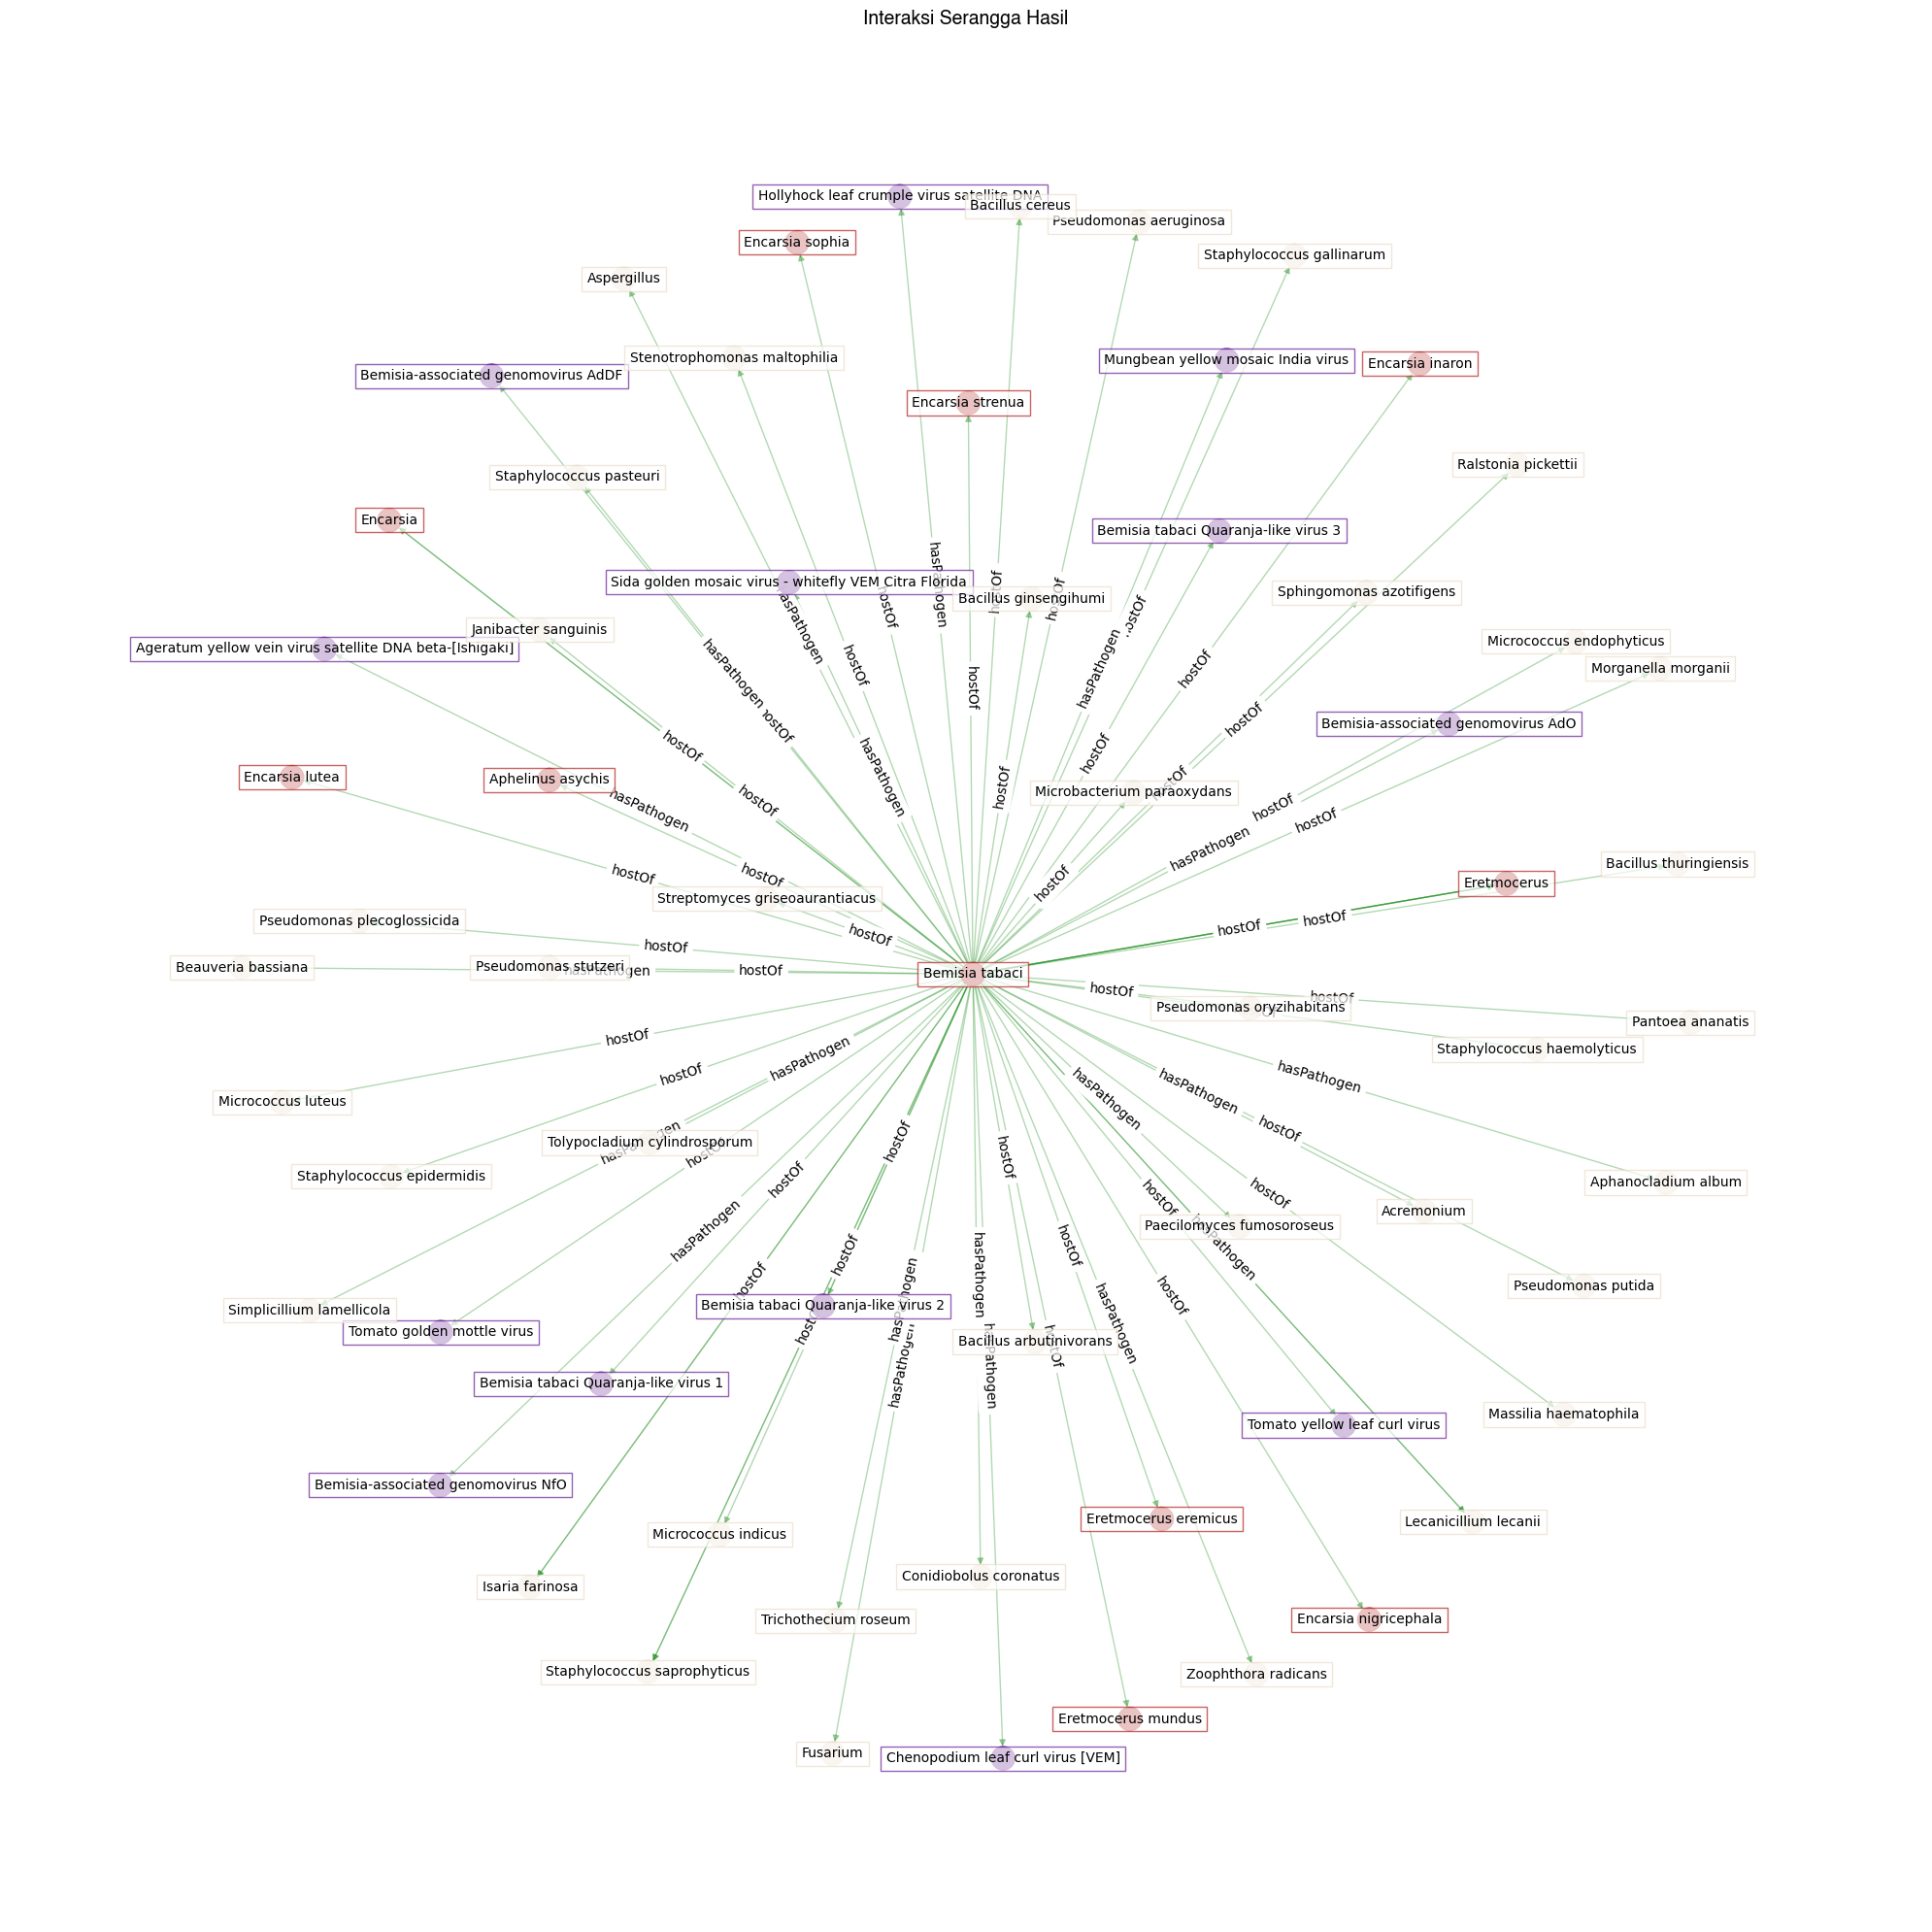

In [160]:
# cuma tampilan, visualisasi graf
G=gnx

fig, ax = plt.subplots(figsize=(20, 20))

# Generate layout for visualization
# pos = nx.kamada_kawai_layout(G)
# pos = nx.spring_layout(G)
pos = nx.nx_agraph.graphviz_layout(G, prog="neato", args="")

# Visualize graph components
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='g')
nx.draw_networkx_nodes(G, pos, node_color=list(nx.get_node_attributes(G, "color").values()), alpha=0.9)

#node label
for i in ['#b22222','#671f92','#1f922b','#EADDCA']: # filtering dengan bedakan warna node
    label_options = {"ec": i, "fc": 'white', "alpha": 0.7}
    labels={nd[0]:nd[1]['label'] for nd in gnx.nodes(data=True) if nd[1]['color']==i}

    nx.draw_networkx_labels(
        nx.subgraph_view(G, filter_node=lambda n1: G.nodes(data=True)[n1].get("color", True) == i),
        pos, 
        labels=labels,
        font_size=10, 
        bbox=label_options
    )

#edge labels
edge_labels={x:i for i,x in zip(nx.get_edge_attributes(G, "label").values(),G.edges())}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


# Title/legend
font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 14}
ax.set_title("Interaksi Serangga Hasil", font)
# Change font color for legend
font["color"] = "r"

# ax.text(
#     0.80,
#     0.10,
#     "hijau = Tanaman",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )
# ax.text(
#     0.80,
#     0.08,
#     "merah = Serangga",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )

# ax.text(
#     0.80,
#     0.06,
#     "ungu = Virus",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )

# ax.text(
#     0.80,
#     0.04,
#     "abu-abu = Nogroup",
#     horizontalalignment="center",
#     transform=ax.transAxes,
#     fontdict=font,
# )

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [161]:
df_node[df_node.taxon_name.str.contains(r'\b(eretmocerus\w*|\w*eretmocerus)\b',case=False)][[
    'taxon_name','taxon_id','superkingdom','kingdom','phylum','class','order','family','genus','species'
    ]]

/var/folders/b9/v73gyxys1djbgjy3c8c3cfwm0000gn/T/ipykernel_80484/1455527824.py:1: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



,taxon_name,taxon_id,superkingdom,kingdom,phylum,class,order,family,genus,species
16,Eretmocerus staufferi,NCBI:77301,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,EOL:844043_Eretmocerusstaufferi
17,Eretmocerus melanoscutus,NCBI:77301,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,EOL:844096_Eretmocerusmelanoscutus
18,Eretmocerus tejanus,NCBI:77301,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,EOL:844042_Eretmocerustejanus
20,Eretmocerus eremicus,NCBI:272444,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,NCBI:272444_Eretmocerus eremicus
25,Eretmocerus,NCBI:77301,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,None
32,Eretmocerus mundus,NCBI:77302,NCBI:2759_Eukaryota,NCBI:33208_Metazoa,NCBI:6656_Arthropoda,NCBI:50557_Insecta,NCBI:7399_Hymenoptera,NCBI:108385_Aphelinidae,NCBI:77301_Eretmocerus,NCBI:77302_Eretmocerus mundus


In [162]:
gnx.nodes(data=True)['NCBI:77301']

{'label': 'Eretmocerus',
 'superkingdom': 'NCBI:2759_Eukaryota',
 'kingdom': 'NCBI:33208_Metazoa',
 'filum': 'NCBI:6656_Arthropoda',
 'kelas': 'NCBI:50557_Insecta',
 'ordo': 'NCBI:7399_Hymenoptera',
 'famili': 'NCBI:108385_Aphelinidae',
 'genus': 'NCBI:77301_Eretmocerus',
 'spesies': None,
 'group': 'serangga',
 'color': '#b22222'}

In [163]:
# cuma tampilan
import plotly.graph_objects as go
data = df_node[df_node['taxon_id']!='NCBI:7038'] #yang bukan serangga utama
data = data.groupby(['group','color']).agg({'group': ['count'], }).reset_index().sort_values(
    ('group', 'count'),ascending=False
).reset_index(drop=True).values
labels = [i[0] for i in data]
colors = [i[1] for i in data]
slices = [i[2] for i in data]

fig = go.Figure(data=[go.Pie(labels=labels,values=slices)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=20, marker=dict(colors=colors, line=dict(color='#000000', width=0.1)))
fig.show()

In [164]:
df_node[df_node['group']=='serangga'][['taxon_id','taxon_name','species']]

,taxon_id,taxon_name,species
16,NCBI:77301,Eretmocerus staufferi,EOL:844043_Eretmocerusstaufferi
17,NCBI:77301,Eretmocerus melanoscutus,EOL:844096_Eretmocerusmelanoscutus
18,NCBI:77301,Eretmocerus tejanus,EOL:844042_Eretmocerustejanus
19,NCBI:261664,Encarsia strenua,NCBI:261664_Encarsia strenua
20,NCBI:272444,Eretmocerus eremicus,NCBI:272444_Eretmocerus eremicus
21,NCBI:121805,Encarsia nigricephala,NCBI:121805_Encarsia nigricephala
22,NCBI:32399,Encarsia quaintancei,EOL:844576_Encarsiaquaintancei
23,NCBI:121802,Encarsia lutea,NCBI:121802_Encarsia lutea
24,NCBI:163151,Aphelinus asychis,EOL:1067535_Aphelinusasychis
25,NCBI:77301,Eretmocerus,None


# Enhancement : Wikidata

In [179]:
item="Bemisia Tabaci"
url = f"https://www.wikidata.org/w/api.php?action=wbsearchentities&search={item}&language=en&format=json"
data = requests.get(url).json()

In [181]:
data['search'][0]['id']

'Q1303946'

In [205]:
# generate fact box
def getFactBox(wd):
    format_='json'
    endpoint_url='https://query.wikidata.org/sparql'
    query="""
    SELECT ?property ?value
    WHERE {
        #dibagi jika value nya IRI atau literal, terus digabungkan lagi
        {   # IRI values
            wd:"""+wd+""" ?prop ?v .
            FILTER(CONTAINS(STR(?prop),"http://www.wikidata.org/prop/direct/")) # direct/truthy properties
            ?fullprop wikibase:directClaim ?prop .
            ?fullprop rdfs:label ?property . # get the label of direct properties
            FILTER(LANG(?property) = "en") # EN label of property
            FILTER(!(CONTAINS(?property,"ID"))) # get rid of identifier properties
            FILTER NOT EXISTS { ?fullprop wikibase:propertyType wikibase:ExternalId }
            FILTER(ISIRI(?v)) # IRI value
            ?v rdfs:label ?value . # label of the IRI value
            FILTER(LANG(?value) = "en") # EN label of IRI value
        } UNION
        {  # literal values
            wd:"""+wd+""" ?prop ?v . 
            FILTER(CONTAINS(STR(?prop),"http://www.wikidata.org/prop/direct/")) # direct/truthy properties
            ?fullprop wikibase:directClaim ?prop .
            ?fullprop rdfs:label ?property . # get the label of direct properties
            FILTER(LANG(?property) = "en") # EN label of property
            FILTER(!(CONTAINS(?property,"ID"))) # get rid of identifier properties
            FILTER NOT EXISTS { ?fullprop wikibase:propertyType wikibase:ExternalId }
            FILTER(!(ISIRI(?v))) # non-IRI value aka literal
            BIND(?v AS ?value) # variable renaming
        }
    } ORDER BY ?property ?value # sort by property then value
    """
    
    #querying
    spw=SPARQLWrapper(endpoint_url)
    spw.setQuery(query)
    spw.setReturnFormat(format_)
    hasil=spw.query().convert()
    # pprint(hasil)
    
    #df convert
    ls = []
    for h in hasil['results']['bindings']:
        ls.append((h['property']['value'],h['value']['value']))

    df=pd.DataFrame(ls, columns=['property','value'])
    return df

In [216]:
getFactBox(data['search'][0]['id'])

,property,value
0,Commons category,Bemisia tabaci
1,Commons gallery,Bemisia tabaci
2,host,tomato
3,instance of,taxon
4,main food source,tomato
5,maintained by WikiProject,WikiProject Invasion Biology
6,parent taxon,Bemisia
7,taxon common name,Sweet potato whitefly
8,taxon common name,Sweetpotato whitefly
9,taxon common name,etelänjauhiainen


In [1]:
# df_node[df_node['taxon_id']=='NCBI:7038']
from modul.standardization_usingsparql import getTaxonomy, getDescendant
endpoint_url='http://localhost:3030/mydataset/query'
ini=getTaxonomy("NCBI:7038",endpoint_url)[1][2]

In [4]:
import pandas as pd
data=getDescendant(ini, endpoint_url)
df = pd.DataFrame(data, columns= ['Name','Taxon','Taxon ID'])


In [5]:
df

,Name,Taxon,Taxon ID
0,Bemisia,genus,NCBI:7037
1,Bemisia nr. tabaci 'Renmark',species,NCBI:111471
2,Bemisia aff. tabaci LZ-2012,species,NCBI:1168090
3,Bemisia sp. LZ-2012,species,NCBI:1168091
4,Bemisia sp. Unknown_Th_13_12_S.lycopersicum,species,NCBI:1775787
5,Bemisia sp. Unknown_Vn_13_43_Weed,species,NCBI:1775788
6,Bemisia sp. WTT-2017,species,NCBI:1974374
7,Bemisia sp. BIOUG04903-G02,species,NCBI:1996894
8,Bemisia sp. NS-2019,species,NCBI:2591941
9,Bemisia sp. PB-2004,species,NCBI:267824


In [51]:
# artikel
from modul.disambiguation_optimized import __querying

format_='json'
endpoint_url='https://query.wikidata.org/sparql'
query = """
SELECT ?date ?venue ?title ?url {
    ?s wdt:P921 wd:Q1303946 . # main subject about COVID-19
    { { ?s wdt:P31 wd:Q580922 } UNION { ?s wdt:P31 wd:Q13442814 } } # preprint or scholarly article
    ?s wdt:P1476 ?title .
    ?s wdt:P356 ?doi .
    BIND(IRI(CONCAT("https://doi.org/", STR(?doi))) AS ?url)
    ?s wdt:P577 ?date .
    ?s wdt:P1433 ?venueRes .
    ?venueRes wdt:P1476 ?venue .
}
"""
hasil=__querying(endpoint_url,query,format_)
kembalian=[
        (
            i['date']['value'].split('T')[0],
            i['title']['value'],
            i['venue']['value'],
            i['url']['value'].replace('https://doi.org/','doi:')
        ) 
        for i in hasil['results']['bindings']
    ]

In [52]:

df = pd.DataFrame(kembalian, columns= ['date','title','venue','url'])

In [57]:
for i in df.sort_values('date',ascending=False).reset_index(drop=True).head(12).title:
    print(i)

Isolation and molecular characterization of Cordyceps sp. from Bemisia tabaci (Hemiptera: Aleyrodidae) and pathogenic to Glycaspis brimblecombei (Hemiptera: Aphalaridae)
Bemisia tabaci MEAM1 still remains the dominant species in open field crops in Brazil
Insecticide Resistance and Its Management in Two Invasive Cryptic Species of Bemisia tabaci in China
Field-evolved resistance and mechanisms in Bemisia tabaci Asia I to a novel pyropene insecticide, afidopyropen, in India
Predicting Climate Change Effects on the Potential Distribution of Two Invasive Cryptic Species of the Bemisia tabaci Species Complex in China
Evaluation of the Efficacy of Flupyradifurone against Bemisia tabaci on Cassava in Tanzania
Epidemiological Analysis of Cassava Mosaic and Brown Streak Diseases, and Bemisia tabaci in the Comoros Islands
The efficacy of certain insecticides against whitefly, Bemisia tabaci (Genn.) on tomato and their effects on fruit quality
The efficacy of certain insecticides against whitefl

In [63]:
df.groupby('venue').count().sort_values('title',ascending=False).reset_index().head(10)

,venue,date,title,url
0,Acta Entomologica Sinica,140,140,140
1,昆虫学报,140,140,140
2,Pest Management Science,93,93,93
3,Journal of Economic Entomology,82,82,82
4,PLOS ONE,56,56,56
5,Insects,47,47,47
6,Bulletin of Entomological Research,46,46,46
7,Neotropical entomology,36,36,36
8,Neotropical Entomology,36,36,36
9,Scientific Reports,33,33,33
